In [ ]:
- Load train.csv, store.csv and test.csv files
- Exploratory data analysis
- Data preprocessing 
- Data transformation

In [1]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# Loading train.csv file
training_data = pd.read_csv("train.csv",parse_dates=['Date'], dayfirst=True,low_memory=False)

In [3]:
training_data.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1


In [4]:
# # Loading store.csv file
store_data = pd.read_csv("store.csv")

In [5]:
store_data.head(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [6]:
# creating a class which upon calling gives summary of dataset and number of missing values(if any) in the dataset passed
class information:
    
    "This class gives information(length,datatypes,missing values) about dataset passed"
    
    def __init__(self,data):
        self.data = data
        
    def data_info(self):
        """This function prints information about dataset passed"""
        print(self.data.info())
        print("--------------------------")
        
    def data_describe(self):
        "This function prints the statistical description of dataset passed"
        print(self.data.describe())
        
    def get_missing_values(self):
        """This function returns missing values in each column of the dataset passed"""
        missing_values = (self.data.isnull().sum()).sort_values(ascending=False)
        print("Missing Values count: ")
        print(missing_values)

In [7]:
"Initializing object of information class to get the information about train.csv data"

train = information(training_data)
train.data_info()
train.get_missing_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB
None
--------------------------
Missing Values count: 
SchoolHoliday    0
StateHoliday     0
Promo            0
Open             0
Customers        0
Sales            0
Date             0
DayOfWeek        0
Store            0
dtype: in

In [8]:
print("The number of stores : ",training_data['Store'].nunique(),"\n")

print("The sales data was gathered from : ")
print("Start Date: ",training_data['Date'].unique().min())
print("End Date: ",training_data['Date'].unique().max())

The number of stores :  1115 

The sales data was gathered from : 
Start Date:  2013-01-01T00:00:00.000000000
End Date:  2015-07-31T00:00:00.000000000


In [9]:
"""Minimum number of customers, sales and maximum number of cutomers and sales in the data"""

minn =training_data.min()
maxx = training_data.max()
print(minn)
print(" ")
print(maxx)

Store                              1
DayOfWeek                          1
Date             2013-01-01 00:00:00
Sales                              0
Customers                          0
Open                               0
Promo                              0
StateHoliday                       0
SchoolHoliday                      0
dtype: object
 
Store                           1115
DayOfWeek                          7
Date             2015-07-31 00:00:00
Sales                          41551
Customers                       7388
Open                               1
Promo                              1
StateHoliday                       c
SchoolHoliday                      1
dtype: object


In [10]:
print(training_data.Open.value_counts())
training_data[(training_data.Open == 0) & (training_data.Sales !=0)]

1    844392
0    172817
Name: Open, dtype: int64


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [11]:
#Observation : There are 172817 rows where the store is closed, since the store is close there are no sales

In [420]:
training_data.Promo.value_counts()

0    629129
1    388080
Name: Promo, dtype: int64

In [12]:
training_data.groupby('Promo')['Customers','Sales'].sum()

<ipython-input-12-7d20c52ffdf4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  training_data.groupby('Promo')['Customers','Sales'].sum()


,Customers,Sales
Promo,,
0,325777807,2771974337
1,318263948,3101206286


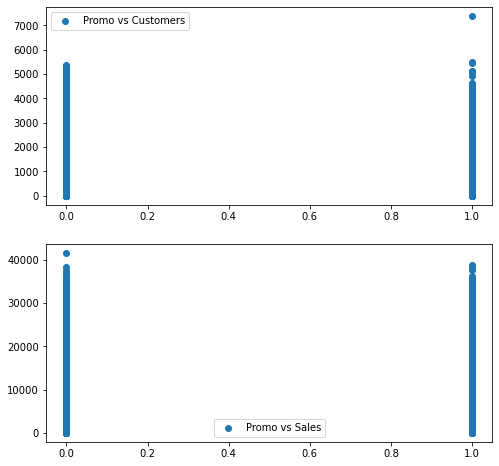

In [422]:
plt.figure(figsize=(8,8))
plt.xlabel("Promo")

plt.subplot(211)
plt.scatter(training_data['Promo'],training_data['Customers'],label="Promo vs Customers")
plt.legend()
plt.subplot(212)
plt.scatter(training_data['Promo'],training_data['Sales'],label="Promo vs Sales")
plt.legend()
plt.show()

In [423]:
"""Observation: Running a promo is not directly contributing the improvement in sales, but by running promos, stores are attracting
more customers but promo is not significantly improving the sales"""

'Observation: Running a promo is not directly contributing the improvement in sales, but by running promos, stores are attracting\nmore customers but promo is not significantly improving the sales'

Text(0.5, 1.0, 'Effect of DayofWeek on Customers and Sales')

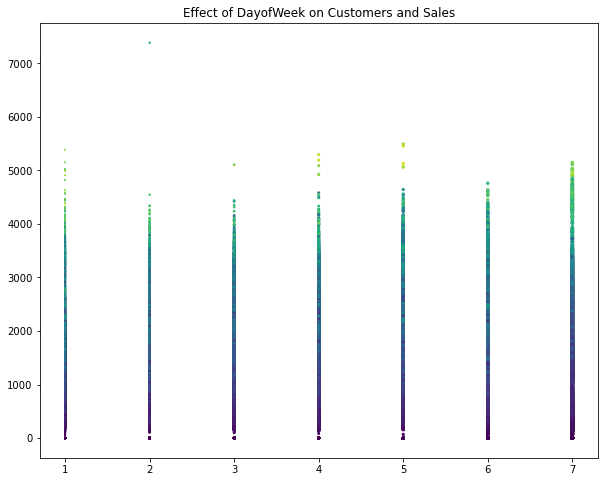

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(training_data['DayOfWeek'],training_data['Customers'],training_data['DayOfWeek'],training_data['Sales'])
plt.title("Effect of DayofWeek on Customers and Sales")

In [ ]:
"""Observation: At the end of week we can see that, the number of customers are slightly higher"""

In [14]:
"""Initializing the object of information class to get information about store data"""

store = information(store_data)
store.data_info()
store.get_missing_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
None
--------------------------
Missing Values count: 
PromoInterval                544
Promo2SinceYear              544
Promo2SinceWeek              544
Comp

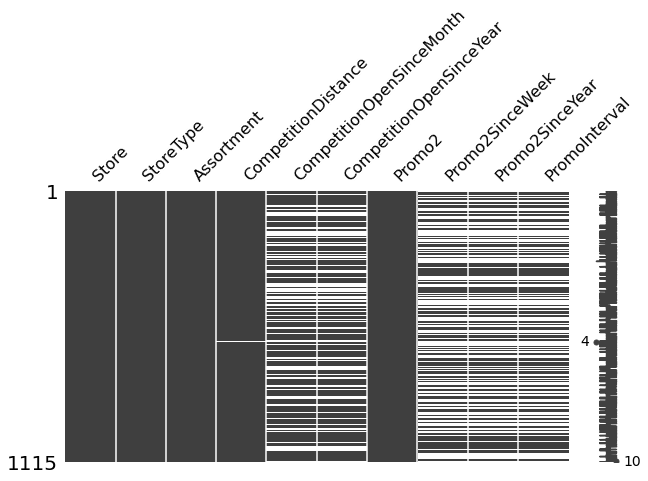

In [426]:
msno.matrix(store_data,figsize=(10,5))

## Preprocessing the data

- There are missing values in many columns in store data.
- Missing values in "CompetitionDistance" are replaced by this column median.
- The missing values in remaining columns are replaced by mode.

In [16]:
class data_preprocessing:
    """ This class processes the missing values in the dataset passed """
    
    def __init__(self,data):
        self.data = data
            
    def handle_missing_values(self):
        for column in self.data.columns:
            if self.data[column].isnull().sum() != 0:
                #print(column)
                if column == "CompetitionDistance":
                    self.data[column].fillna(self.data[column].median(),inplace=True)
                elif column == "CompetitionOpenSinceYear" or column =="CompetitionOpenSinceMonth" or column == "Promo2SinceYear" or column == "PromoInterval" or column == "Promo2SinceWeek":
                    self.data[column].fillna(self.data[column].mode()[0],inplace=True)
                    
        print(self.data.isnull().sum())

In [17]:
preprocess = data_preprocessing(store_data)
preprocess.handle_missing_values()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


### Data Transformation

In [536]:
"""Extarcting new columns from existing columns Sales and Customers"""

new_cols = training_data.groupby('Store')['Customers','Sales'].mean()
new_cols[['Avg_customers','Avg_Sales']] = new_cols

<ipython-input-536-324d04cad37f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new_cols = training_data.groupby('Store')['Customers','Sales'].mean()


In [537]:
new_cols

,Customers,Sales,Avg_customers,Avg_Sales
Store,,,,
1,467.646497,3945.704883,467.646497,3945.704883
2,486.045648,4122.991507,486.045648,4122.991507
3,620.286624,5741.253715,620.286624,5741.253715
4,1100.057325,8021.769639,1100.057325,8021.769639
5,444.360934,3867.110403,444.360934,3867.110403
...,...,...,...,...
1111,373.548832,4342.968153,373.548832,4342.968153
1112,693.498938,8465.280255,693.498938,8465.280255
1113,596.763270,5516.180467,596.763270,5516.180467


In [538]:
new_cols.drop(columns = ['Customers','Sales'],inplace=True)

In [539]:
new_cols

,Avg_customers,Avg_Sales
Store,,
1,467.646497,3945.704883
2,486.045648,4122.991507
3,620.286624,5741.253715
4,1100.057325,8021.769639
5,444.360934,3867.110403
...,...,...
1111,373.548832,4342.968153
1112,693.498938,8465.280255
1113,596.763270,5516.180467


In [540]:
"""Adding new columns to train.csv file"""
averaged_data = training_data.merge(new_cols,on='Store',how='left')
averaged_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Avg_customers,Avg_Sales
0,1,5,2015-07-31,5263,555,1,1,0,1,467.646497,3945.704883
1,2,5,2015-07-31,6064,625,1,1,0,1,486.045648,4122.991507
2,3,5,2015-07-31,8314,821,1,1,0,1,620.286624,5741.253715
3,4,5,2015-07-31,13995,1498,1,1,0,1,1100.057325,8021.769639
4,5,5,2015-07-31,4822,559,1,1,0,1,444.360934,3867.110403
...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,373.548832,4342.968153
1017205,1112,2,2013-01-01,0,0,0,0,a,1,693.498938,8465.280255
1017206,1113,2,2013-01-01,0,0,0,0,a,1,596.763270,5516.180467
1017207,1114,2,2013-01-01,0,0,0,0,a,1,2664.057325,17200.196391


In [541]:
"""merging store data with train data"""

merged_train = store_data.merge(averaged_data,on='Store',how='inner')
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   StoreType                  1017209 non-null  object        
 2   Assortment                 1017209 non-null  object        
 3   CompetitionDistance        1017209 non-null  float64       
 4   CompetitionOpenSinceMonth  1017209 non-null  float64       
 5   CompetitionOpenSinceYear   1017209 non-null  float64       
 6   Promo2                     1017209 non-null  int64         
 7   Promo2SinceWeek            1017209 non-null  float64       
 8   Promo2SinceYear            1017209 non-null  float64       
 9   PromoInterval              1017209 non-null  object        
 10  DayOfWeek                  1017209 non-null  int64         
 11  Date                       1017209 no

In [ ]:
print(merged_train.StateHoliday.unique())
print(merged_train.StoreType.unique())
print(merged_train.PromoInterval.unique())
print(merged_train.StateHoliday.unique())

### Extracting new columns using existing date column

In [545]:
merged_train['day'] = merged_train['Date'].dt.day
merged_train['month'] = merged_train['Date'].dt.month
merged_train['year'] = merged_train['Date'].dt.year

### converting the object type columns to numeric using map

In [543]:
merged_train.StateHoliday = merged_train.StateHoliday.map({'a':1,'b':2,'c':3,'0':0,0:0})
merged_train.StoreType = merged_train.StoreType.map({'a':0, 'b':1,'c':2,'d':3})
merged_train.Assortment = merged_train.Assortment.map({'a':0,'b':1,'c':2})
merged_train.PromoInterval = merged_train.PromoInterval.map({0:0,'Jan,Apr,Jul,Oct':1, 'Feb,May,Aug,Nov':2, 'Mar,Jun,Sept,Dec':3})

In [546]:
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   StoreType                  1017209 non-null  int64         
 2   Assortment                 1017209 non-null  int64         
 3   CompetitionDistance        1017209 non-null  float64       
 4   CompetitionOpenSinceMonth  1017209 non-null  float64       
 5   CompetitionOpenSinceYear   1017209 non-null  float64       
 6   Promo2                     1017209 non-null  int64         
 7   Promo2SinceWeek            1017209 non-null  float64       
 8   Promo2SinceYear            1017209 non-null  float64       
 9   PromoInterval              1017209 non-null  int64         
 10  DayOfWeek                  1017209 non-null  int64         
 11  Date                       1017209 no

In [547]:
merged_train.to_csv("TrainData_Kaggle.csv",index=False)

### Full training data after all the preprocessing and transformation done

In [548]:
"""This is the final training data used for feeding for deep neural network"""

data = pd.read_csv("TrainData_Kaggle.csv")

In [552]:
data.head(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Customers,Open,Promo,StateHoliday,SchoolHoliday,Avg_customers,Avg_Sales,day,month,year
0,1,2,0,1270.0,9.0,2008.0,0,14.0,2011.0,1,...,555,1,1,0,1,467.646497,3945.704883,31,7,2015
1,1,2,0,1270.0,9.0,2008.0,0,14.0,2011.0,1,...,546,1,1,0,1,467.646497,3945.704883,30,7,2015


### Plotting the final data to see the trends

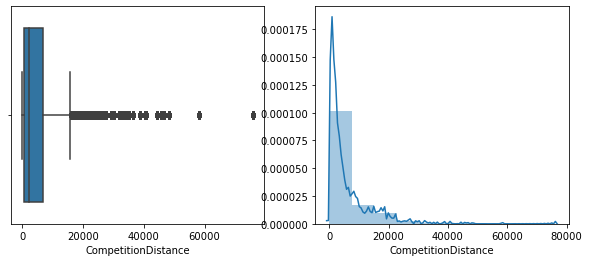

In [553]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.boxplot(data['CompetitionDistance'])
plt.subplot(122)
sns.distplot(data['CompetitionDistance'],bins=10)

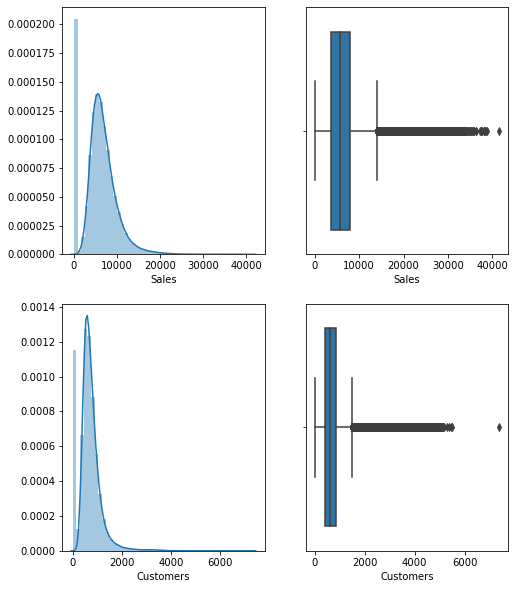

In [554]:
plt.figure(figsize=(8,10))
plt.subplot(221)
sns.distplot(data.Sales)
plt.subplot(222)
sns.boxplot(data.Sales)
plt.subplot(223)
sns.distplot(data.Customers)
plt.subplot(224)
sns.boxplot(data.Customers)


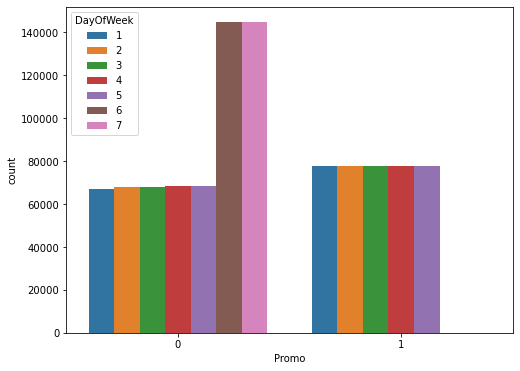

In [555]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'Promo',hue='DayOfWeek',data=data)

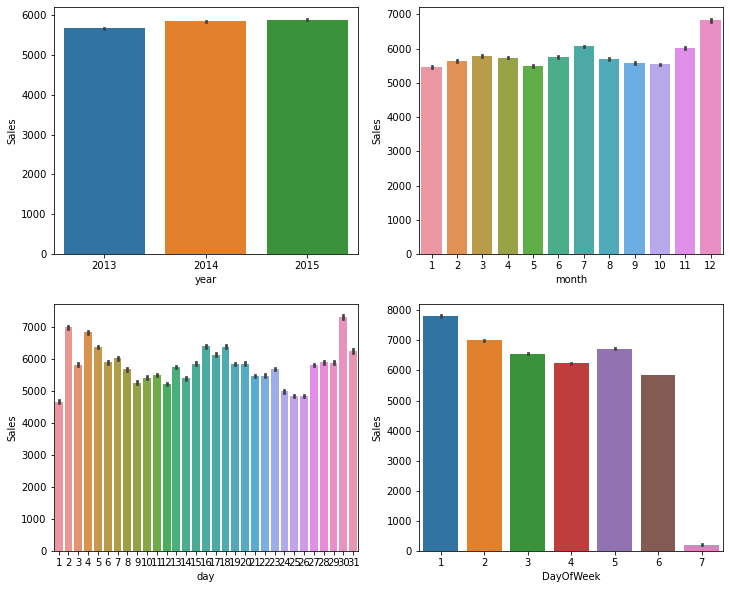

In [556]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.barplot(x="year",y="Sales",data=data)
plt.subplot(222)
sns.barplot(x="month",y="Sales",data=data)
plt.subplot(223)
sns.barplot(x="day",y="Sales",data=data)
plt.subplot(224)
sns.barplot(x="DayOfWeek",y="Sales",data=data)

Text(0, 0.5, 'Customers')

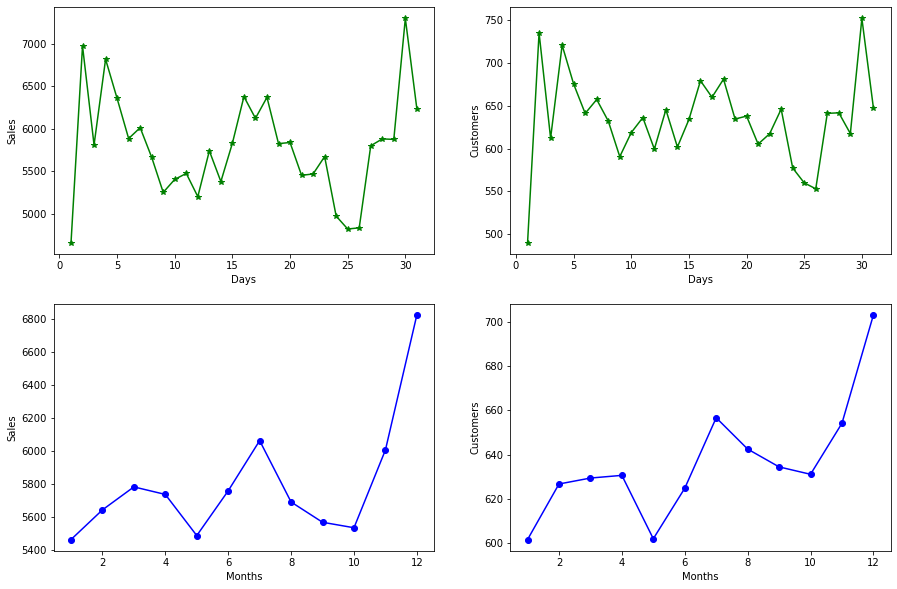

In [558]:
plt.figure(figsize=(15,10))

plt.subplot(221)

figure2 = data.groupby('day')['Sales'].mean()
plt.plot(figure2,marker ='*',color='green')
plt.xlabel('Days')
plt.ylabel('Sales')


plt.subplot(222)

figure2 = data.groupby('day')['Customers'].mean()
plt.plot(figure2,marker ='*',color='green')
plt.xlabel('Days')
plt.ylabel('Customers')


plt.subplot(223)

figure1 = data.groupby('month')['Sales'].mean()
plt.plot(figure1,marker ='o',color='blue')
plt.xlabel('Months')
plt.ylabel('Sales')


plt.subplot(224)

figure2 = data.groupby('month')['Customers'].mean()
plt.plot(figure2,marker ='o',color='blue')
plt.xlabel('Months')
plt.ylabel('Customers')


### Correlation map

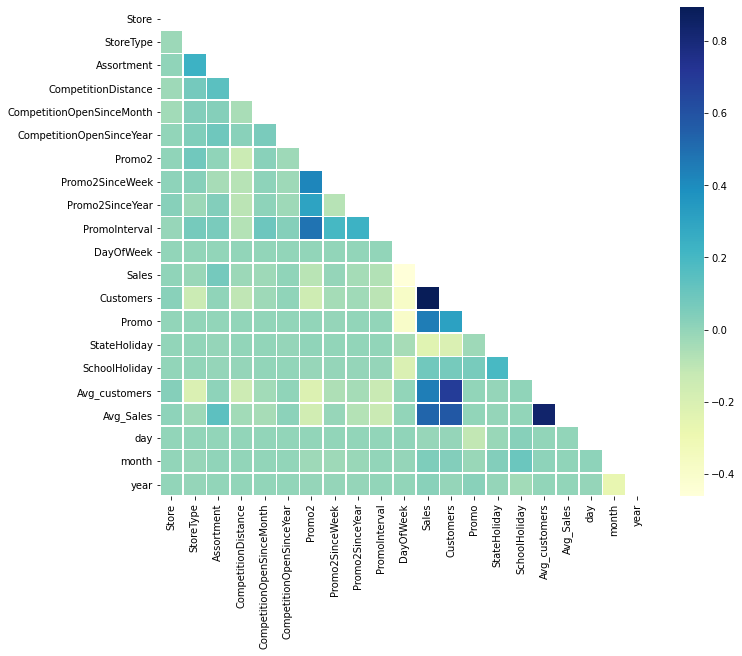

In [579]:

corr_all = data.drop('Open', axis = 1).corr()

zero_mask = np.zeros_like(corr_all, dtype = np.bool)
zero_mask[np.triu_indices_from(zero_mask)] = True

f, axes = plt.subplots(figsize = (11, 9))
sns.heatmap(corr_all, mask = zero_mask,square = True, linewidths = .6, ax = axes,cmap="YlGnBu")      
plt.show()


In [577]:
Correlation_customer = corr_all.loc['Customers'].sort_values(ascending=False)
Correlation_customer

Customers                    1.000000
Sales                        0.894711
Avg_customers                0.691644
Avg_Sales                    0.581338
Promo                        0.316169
SchoolHoliday                0.071568
month                        0.038179
Store                        0.024325
Assortment                   0.007044
CompetitionOpenSinceYear     0.006541
year                        -0.001212
day                         -0.004473
CompetitionOpenSinceMonth   -0.024093
Promo2SinceYear             -0.029347
Promo2SinceWeek             -0.041427
PromoInterval               -0.091360
CompetitionDistance         -0.102362
StoreType                   -0.141423
Promo2                      -0.150159
StateHoliday                -0.204295
DayOfWeek                   -0.386445
Name: Customers, dtype: float64

In [576]:
Correlation_sales = corr_all.loc['Sales'].sort_values(ascending=False)
Correlation_sales

Sales                        1.000000
Customers                    0.894711
Avg_Sales                    0.533902
Promo                        0.452345
Avg_customers                0.448753
SchoolHoliday                0.085124
Assortment                   0.074941
month                        0.048768
year                         0.023519
CompetitionOpenSinceYear     0.008740
Store                        0.005126
Promo2SinceWeek             -0.003562
day                         -0.011612
StoreType                   -0.013057
CompetitionDistance         -0.018869
CompetitionOpenSinceMonth   -0.023226
Promo2SinceYear             -0.040708
PromoInterval               -0.071308
Promo2                      -0.091040
StateHoliday                -0.229029
DayOfWeek                   -0.462125
Name: Sales, dtype: float64

### Processing the test data

In [580]:
test_data = pd.read_csv("test.csv",parse_dates=['Date'])

In [581]:
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [582]:
"""extracting day, month and year from date column to create new columns"""
test_data['day'] = test_data['Date'].dt.day
test_data['month'] = test_data['Date'].dt.month
test_data['year'] = test_data['Date'].dt.year

In [583]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41077 non-null  float64       
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 non-null  object        
 7   SchoolHoliday  41088 non-null  int64         
 8   day            41088 non-null  int64         
 9   month          41088 non-null  int64         
 10  year           41088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(8), object(1)
memory usage: 3.4+ MB


In [587]:
"""merging new columns with test data"""
new_store = store_data.merge(new_cols,on='Store',how='left')

In [588]:
new_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Avg_customers,Avg_Sales
0,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",467.646497,3945.704883
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",486.045648,4122.991507
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",620.286624,5741.253715
3,4,c,c,620.0,9.0,2009.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",1100.057325,8021.769639
4,5,a,a,29910.0,4.0,2015.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",444.360934,3867.110403


In [589]:
"""merging test data with store data"""
merg_test = test_data.merge(new_store,on='Store',how='left')

In [590]:
merg_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,day,month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Avg_customers,Avg_Sales
0,1,1,4,2015-09-17,1.0,1,0,0,17,9,...,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",467.646497,3945.704883
1,2,3,4,2015-09-17,1.0,1,0,0,17,9,...,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",620.286624,5741.253715
2,3,7,4,2015-09-17,1.0,1,0,0,17,9,...,c,24000.0,4.0,2013.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",791.474522,7356.902335
3,4,8,4,2015-09-17,1.0,1,0,0,17,9,...,a,7520.0,10.0,2014.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",547.799363,4610.251592
4,5,9,4,2015-09-17,1.0,1,0,0,17,9,...,c,2030.0,8.0,2000.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",479.487261,5426.816348


In [591]:
merg_test.drop('Date',inplace = True, axis =1)
merg_test.to_csv("TestData_Kaggle.csv",index='id')

In [592]:
"""This is the final test data to test on the deep neural network"""
Conv_data = pd.read_csv("TestData_Kaggle.csv")

C:\Users\Bhuvi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [593]:
Conv_data.head()

,Unnamed: 0,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,day,month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Avg_customers,Avg_Sales
0,0,1,1,4,1.0,1,0,0,17,9,...,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",467.646497,3945.704883
1,1,2,3,4,1.0,1,0,0,17,9,...,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",620.286624,5741.253715
2,2,3,7,4,1.0,1,0,0,17,9,...,c,24000.0,4.0,2013.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",791.474522,7356.902335
3,3,4,8,4,1.0,1,0,0,17,9,...,a,7520.0,10.0,2014.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",547.799363,4610.251592
4,4,5,9,4,1.0,1,0,0,17,9,...,c,2030.0,8.0,2000.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",479.487261,5426.816348
